In [3]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
ls = []
for i in range(1,14):
    ls.append('X'+str(i))
ls.append('Y')
df = pd.read_csv('data11.txt', sep = ' ', header = None, names = ls)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,-8.230,-0.088,11.100,-12.30,-3.76,13.80,21.40,-8.030,14.400,-3.89,-12.20,21.30,12.00,112.0
1,-8.280,-5.790,-7.510,-5.63,18.10,-19.50,-7.69,-8.990,-19.600,16.20,-7.37,-9.13,-5.02,-193.0
2,7.290,-7.910,-0.425,12.50,-12.60,-4.34,8.63,6.250,-4.810,-13.60,12.70,7.75,-0.36,81.8
3,-0.165,-7.480,-13.700,18.90,-10.00,8.19,12.00,-0.222,9.110,-10.00,18.90,10.80,-12.90,96.4
4,-4.880,9.050,0.638,-16.90,9.14,2.35,2.71,-6.850,0.896,8.58,-17.00,1.71,-1.54,-28.4


In [2]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,-0.301908,0.222887,-0.802070,0.410333,0.046610,0.450159,-0.289120,-0.209470,0.520873,0.073810,0.373200,-0.288977,-0.938152,10.852567
std,10.281463,9.624001,10.125789,9.887392,10.626011,10.393669,10.378315,10.259535,10.352126,10.504525,9.983802,10.293594,10.168542,95.156317
min,-38.700000,-29.000000,-30.200000,-28.600000,-28.700000,-28.300000,-29.400000,-39.200000,-27.400000,-29.100000,-30.400000,-28.900000,-29.900000,-236.000000
25%,-7.195000,-6.570000,-8.250000,-6.170000,-6.640000,-7.347500,-7.502500,-6.932500,-6.767500,-6.582500,-6.975000,-7.342500,-8.170000,-52.250000
50%,-0.153500,0.916000,-1.115000,0.872500,-0.190850,1.055000,-0.682000,-0.078500,1.048000,-0.470000,1.035500,-0.771500,-1.325000,14.900000
75%,7.050000,6.867500,6.085000,7.315000,6.945000,7.467500,6.427500,6.962500,7.340000,7.360000,7.495000,6.342500,5.622500,77.250000
max,31.200000,24.200000,25.400000,29.800000,29.100000,27.800000,31.000000,29.200000,28.300000,28.300000,29.900000,30.800000,24.500000,292.000000


In [3]:
#sns.set_style("darkgrid")

In [4]:
corr = df.corr()
corr.round(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
X1,1.000,-0.020,-0.019,0.043,-0.033,0.048,-0.093,0.995,0.049,-0.038,0.033,-0.097,-0.031,0.153
X2,-0.020,1.000,-0.006,-0.105,0.018,-0.050,0.003,-0.029,-0.037,0.026,-0.101,0.012,-0.009,-0.020
X3,-0.019,-0.006,1.000,-0.052,-0.098,-0.017,0.023,-0.013,-0.015,-0.102,-0.052,0.029,0.995,0.040
X4,0.043,-0.105,-0.052,1.000,0.032,-0.032,-0.004,0.054,-0.044,0.027,0.995,-0.003,-0.048,-0.242
X5,-0.033,0.018,-0.098,0.032,1.000,0.061,-0.058,-0.050,0.069,0.995,0.025,-0.064,-0.097,-0.856
X6,0.048,-0.050,-0.017,-0.032,0.061,1.000,-0.000,0.048,0.996,0.054,-0.019,-0.004,-0.026,0.398
X7,-0.093,0.003,0.023,-0.004,-0.058,-0.000,1.000,-0.104,-0.004,-0.051,0.003,0.996,0.023,0.042
X8,0.995,-0.029,-0.013,0.054,-0.050,0.048,-0.104,1.000,0.049,-0.054,0.044,-0.108,-0.026,0.165
X9,0.049,-0.037,-0.015,-0.044,0.069,0.996,-0.004,0.049,1.000,0.062,-0.031,-0.008,-0.024,0.395
X10,-0.038,0.026,-0.102,0.027,0.995,0.054,-0.051,-0.054,0.062,1.000,0.021,-0.057,-0.103,-0.863


In [5]:
corr_y = pd.DataFrame(corr.iloc[:,-1]) # correlation of output with features.
corr_y.T

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
Y,0.15257,-0.020317,0.040448,-0.241762,-0.85615,0.398,0.042208,0.164957,0.394825,-0.862624,-0.231197,0.044876,0.034844,1.0


In [6]:
cov = df.cov()
cov_y = pd.DataFrame(cov.iloc[:,-1]) # correlation of output with features.
cov_y.T.round(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
Y,149.266,-18.606,38.973,-227.461,-865.681,393.631,41.683,161.041,388.93,-862.255,-219.643,43.956,33.715,9054.725


In [7]:
corr_y = pd.DataFrame(corr.iloc[:,-1].abs()) # absolute correlation of output with features.
corr_y.T

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
Y,0.15257,0.020317,0.040448,0.241762,0.85615,0.398,0.042208,0.164957,0.394825,0.862624,0.231197,0.044876,0.034844,1.0


In [2]:
y = df.iloc[:,-1]
X = df.iloc[:,:-1]

In [3]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.366e+06
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:42:39   Log-Likelihood:                -1.0879
No. Observations:                 300   AIC:                             30.18
Df Residuals:                     286   BIC:                             82.03
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0142      0.015    681.683      0.000       9.985      10.043
X1            -0.0131      0.014     -0.918      0.359      -0.041       0.015
X2            -0.0018      0.002     -1.175      0.241      -0.005       0.001
X3            -0.4801      0.015    -32.813      0.000      -0.509      -0.451
X4            -2.0016      0.015   -132.072      0.000      -2.031      -1.972
X5            -0.0074      0.014     -0.534      0.593      -0.035       0.020
X6            -0.0033      0.016     -0.205      0.837      -0.035       0.028
X7            -0.0109      0.015     -0.704      0.482      -0.041       0.020
X8             1.0114      0.014     70.234      0.000       0.983       1.040
X9             4.0015      0.016    247.773      0.000       3.970       4.033
X10           -7.9934      0.014   -569.641      0.000      -8.021      -7.966
X11            0.0016      0.015      0.105      0.916      -0.028       0.031
X12            0.1101      0.016      7.068      0.000       0.079       0.141
X13           -0.0198      0.015     -1.356      0.176      -0.048       0.009
==============================================================================
Omnibus:                       24.222   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.858
Skew:                           0.395   Prob(JB):                     2.02e-12
Kurtosis:                       4.920   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
result.rsquared

0.9999934649314993

In [11]:
pd.DataFrame(result.params).T

,const,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,10.01422,-0.013138,-0.001805,-0.480084,-2.001593,-0.007421,-0.003305,-0.01086,1.011393,4.001499,-7.993391,0.001578,0.110098,-0.019759


In [12]:
pval = pd.DataFrame([result.tvalues,result.pvalues],index = ['t_value', 'p_value'])
pval.round(3)

,const,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
t_value,681.683,-0.918,-1.175,-32.813,-132.072,-0.534,-0.205,-0.704,70.234,247.773,-569.641,0.105,7.068,-1.356
p_value,0.000,0.359,0.241,0.000,0.000,0.593,0.837,0.482,0.000,0.000,0.000,0.916,0.000,0.176


In [14]:
X_new = X[['X3','X4', 'X8', 'X9', 'X10', 'X12']]
X_new

,X3,X4,X8,X9,X10,X12
0,11.100,-12.300,-8.030,14.400,-3.89,21.30
1,-7.510,-5.630,-8.990,-19.600,16.20,-9.13
2,-0.425,12.500,6.250,-4.810,-13.60,7.75
3,-13.700,18.900,-0.222,9.110,-10.00,10.80
4,0.638,-16.900,-6.850,0.896,8.58,1.71
...,...,...,...,...,...,...
295,1.320,5.790,5.110,18.900,-4.29,18.50
296,-2.600,-3.530,-7.950,2.190,-6.29,-3.65
297,2.390,24.200,-7.000,-14.200,4.34,-8.97
298,-8.490,-0.059,-11.500,12.400,-4.37,5.83


In [15]:
X_new = sm.add_constant(X_new)
model = sm.OLS(y, X_new)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.341e+06
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:40:25   Log-Likelihood:                -3.7435
No. Observations:                 300   AIC:                             21.49
Df Residuals:                     293   BIC:                             47.41
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0181      0.014    695.784      0.000       9.990      10.046
X3            -0.4997      0.001   -350.497      0.000      -0.503      -0.497
X4            -1.9998      0.001  -1373.171      0.000      -2.003      -1.997
X8             0.9985      0.001    706.729      0.000       0.996       1.001
X9             3.9984      0.001   2873.832      0.000       3.996       4.001
X10           -8.0011      0.001  -5797.321      0.000      -8.004      -7.998
X12            0.0991      0.001     70.579      0.000       0.096       0.102
==============================================================================
Omnibus:                       20.811   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.158
Skew:                           0.352   Prob(JB):                     4.25e-10
Kurtosis:                       4.719   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
y_pred = result.predict(X)
mean_squared_error(y, y_pred)

0.05897600225106184

In [7]:
residuals = y_pred - y

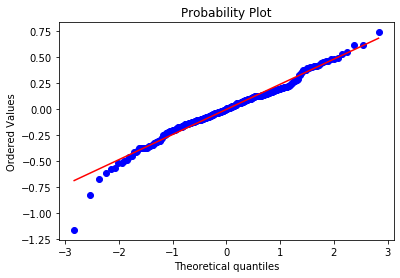

In [10]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

In [13]:
y_pred = result.predict(X)
mean_squared_error(y, y_pred)

0.05897600225106184

In [16]:
residuals = y_pred - y

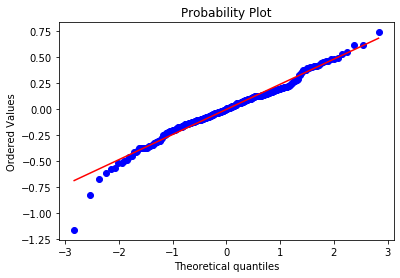

In [17]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

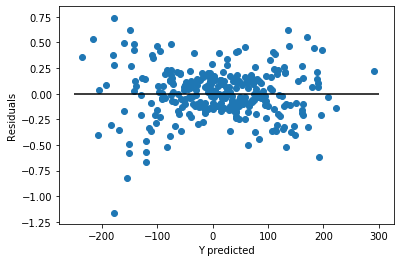

In [18]:
plt.scatter(y_pred, residuals)
plt.xlabel('Y predicted')
plt.ylabel('Residuals')
plt.hlines(0, -250,300)

In [ ]:
########################################################################################################################################################################################################################################################################################

In [19]:
stats.shapiro(residuals)

ShapiroResult(statistic=0.9774775505065918, pvalue=0.00011603281745919958)

In [11]:
stats.kstest(residuals,  'laplace')

KstestResult(statistic=0.29441213357235396, pvalue=1.5424902047807004e-23)

In [21]:
stats.normaltest(residuals)

NormaltestResult(statistic=20.811374459530533, pvalue=3.025989771649485e-05)

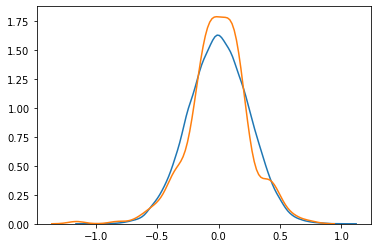

In [25]:
norm = np.random.normal(0,0.24327,30000)
sns.kdeplot(norm)
sns.kdeplot(residuals)

In [ ]:
# pd.DataFrame(residuals).round(3).to_csv('res.csv', index = False)

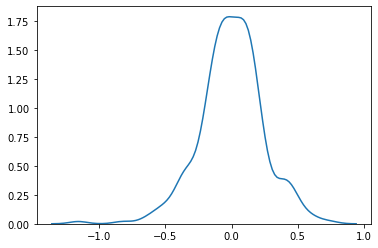

In [59]:
residuals = y_pred - y
sns.kdeplot(residuals)

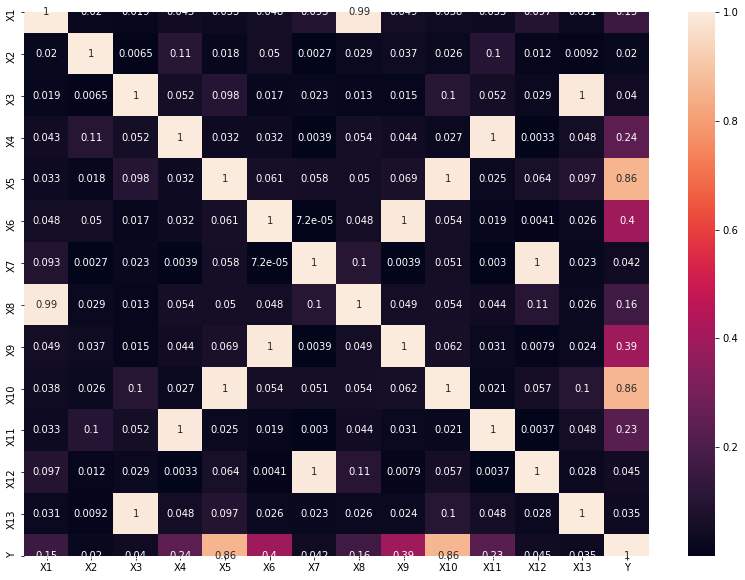

In [64]:
plt.figure(figsize = (14,10))
sns.heatmap(corr.abs(), annot = True)